In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
bayareafips_full = {'06001': 'Alameda', '06013': 'Contra Costa', '06041': 'Marin', '06055': 'Napa',
                    '06075': 'San Francisco', '06081': 'San Mateo', '06085': 'Santa Clara', '06097': 'Sonoma', '06095': 'Solano'}

year_list = list(range(2010,2051,5))

In [7]:
# open workbook
wb = pd.ExcelFile('data/forecast-data-2022-a11y.xlsx')


# Parse bay area counties

In [96]:
new_col_names = {'Unnamed: 0': 'year', 'county': 'countyname',
                 'Population (people)': 'TOTPOP', 'Households (thousands)': 'TOTHH', 'Total Wage & Salary': 'TOTEMP'}

bay_area_data = {}
for countyfips, countyname in bayareafips_full.items():
    print(countyname)
    this_frame = wb.parse(countyname)
    bay_area_data[countyname] = this_frame

# concatenate county frames
bay_area_data = pd.concat(bay_area_data, names=['countyname', 'oid'])

# rename columns
bay_area_data = bay_area_data.rename(columns=new_col_names).reset_index()

# include rows with a year, and keep only column subset
bay_area_data = bay_area_data.loc[bay_area_data.year.notna(
), new_col_names.values()]

# turn to long format
bay_area_data_long = bay_area_data.set_index(['year', 'countyname']).stack()
bay_area_data_long.index = bay_area_data_long.index.set_names('variable', 2)

bay_area_data_long = pd.to_numeric(bay_area_data_long)
bay_area_data_long.loc[:,:,'TOTHH']*=1000
bay_area_data_long.loc[:,:,'TOTEMP']*=1000
bay_area_data_long = bay_area_data_long.astype(int)

Alameda
Contra Costa
Marin
Napa
San Francisco
San Mateo
Santa Clara
Sonoma
Solano


/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_86945/821491993.py:22: FutureWarning: In a future version of pandas all arguments of MultiIndex.set_names except for the argument 'names' will be keyword-only.
  bay_area_data_long.index = bay_area_data_long.index.set_names('variable', 2)


# County summaries

## Employment

In [103]:
bay_area_data_long.loc[year_list,:,'TOTEMP'].unstack(1).reset_index(1,drop=True)

countyname,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
year,,,,,,,,,
2010.0,653580,318150,100266,65390,543609,317759,860280,121090,174400
2015.0,749450,350770,111950,75340,675300,376990,1028869,134430,202969
2020.0,751959,345800,105083,70810,696640,386080,1068301,132420,196260
2025.0,848965,382858,119863,81177,828734,436688,1174795,144913,219927
2030.0,871742,389961,127771,82874,864799,443543,1190516,150504,223418
2035.0,889844,394883,131775,84463,885896,447138,1204466,154298,226285
2040.0,899954,399928,133913,85856,905909,451753,1215461,155943,228989
2045.0,906740,405012,135755,87091,925399,455218,1226775,157309,231199
2050.0,916245,409266,137214,88159,944639,457690,1240316,158777,233813


## Total Population

In [104]:
bay_area_data_long.loc[year_list,:,'TOTPOP'].unstack(1).reset_index(1,drop=True)

countyname,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
year,,,,,,,,,
2010.0,1516617,1052157,252750,136798,809945,721169,1790845,413129,484053
2015.0,1630159,1128317,263964,140955,857037,761484,1914457,435902,497086
2020.0,1681700,1166669,262410,138433,870985,763497,1933516,453405,486772
2025.0,1690878,1183404,257595,136491,856553,733477,1906658,457309,487174
2030.0,1707280,1207024,257329,135785,856039,716294,1934334,475232,484857
2035.0,1712008,1224132,256653,135165,853007,708975,1954472,493261,479004
2040.0,1704829,1233403,254931,133945,848350,706113,1971003,503916,471779
2045.0,1688631,1235509,252202,132318,842562,701416,1983970,519120,463508
2050.0,1666539,1234787,248956,130752,836931,692803,1984426,534629,455255


## Households

In [105]:
bay_area_data_long.loc[year_list,:,'TOTHH'].unstack(1).reset_index(1,drop=True)

countyname,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
year,,,,,,,,,
2010.0,543950,375392,103208,48873,345196,257848,604102,141758,185818
2015.0,557129,383561,104022,49199,354243,260387,624003,145895,188557
2020.0,579058,396099,104975,49085,373404,265689,645764,152102,188767
2025.0,598103,409338,105318,49864,383310,270998,667363,159308,196133
2030.0,612508,423634,105614,51353,393838,275785,685333,168244,202786
2035.0,623761,435940,105956,52422,402813,280673,704909,175877,208921
2040.0,633858,446456,106314,53337,409922,285253,724791,182994,214030
2045.0,643008,456164,106659,54134,415439,289625,745157,189780,218462
2050.0,651557,464630,106996,54844,419663,293609,765942,196307,222333


## Jobs - to households ratio

In [110]:
(bay_area_data_long.loc[year_list, :, 'TOTEMP'].unstack(1).reset_index(
    1, drop=True) / bay_area_data_long.loc[year_list, :, 'TOTHH'].unstack(1).reset_index(1, drop=True))

countyname,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
year,,,,,,,,,
2010.0,1.201544,0.847514,0.971494,1.337958,1.574784,1.232350,1.424064,0.854202,0.938553
2015.0,1.345200,0.914509,1.076215,1.531332,1.906319,1.447807,1.648821,0.921416,1.076433
2020.0,1.298590,0.873014,1.001029,1.442600,1.865647,1.453128,1.654321,0.870600,1.039694
2025.0,1.419429,0.935310,1.138106,1.627968,2.162046,1.611407,1.760354,0.909640,1.121316
2030.0,1.423234,0.920514,1.209792,1.613810,2.195824,1.608293,1.737135,0.894558,1.101743
2035.0,1.426578,0.905820,1.243677,1.611213,2.199274,1.593092,1.708683,0.877306,1.083113
2040.0,1.419804,0.895784,1.259599,1.609689,2.209955,1.583692,1.676981,0.852175,1.069892
2045.0,1.410154,0.887865,1.272795,1.608804,2.227521,1.571750,1.646331,0.828902,1.058303
2050.0,1.406239,0.880843,1.282422,1.607450,2.250947,1.558842,1.619334,0.808820,1.051634


# plots

## Regional totals 

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_86945/253236205.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  bay_area_data_long.loc[:,:,var].sum(level=0).plot(ax=ax)


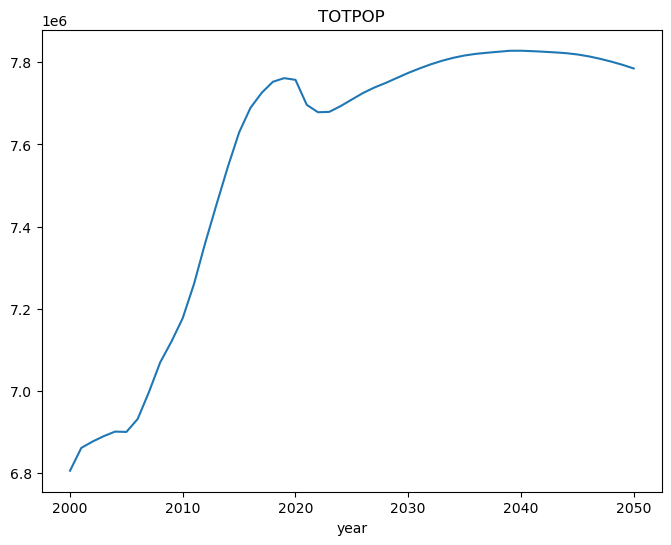

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_86945/253236205.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  bay_area_data_long.loc[:,:,var].sum(level=0).plot(ax=ax)


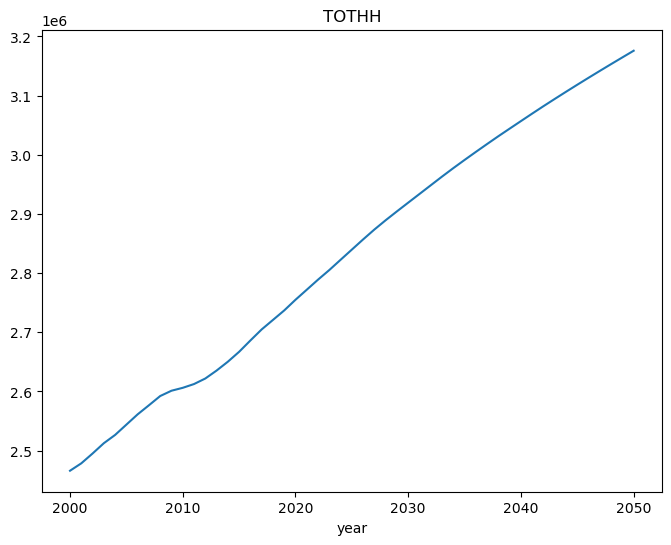

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_86945/253236205.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  bay_area_data_long.loc[:,:,var].sum(level=0).plot(ax=ax)


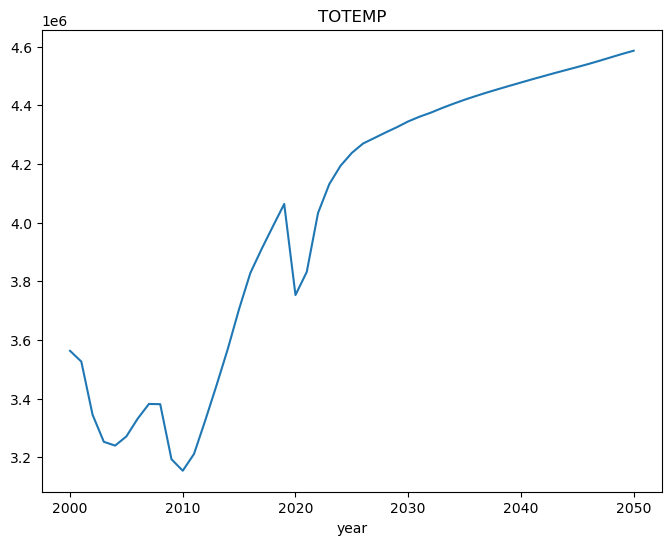

In [100]:
for var in ['TOTPOP','TOTHH','TOTEMP']:
    fig, ax = plt.subplots(figsize=[8,6])
    bay_area_data_long.loc[:,:,var].sum(level=0).plot(ax=ax)
    ax.set_title(f'{var}')
    plt.show()

## Average Household Size

<AxesSubplot: xlabel='year'>

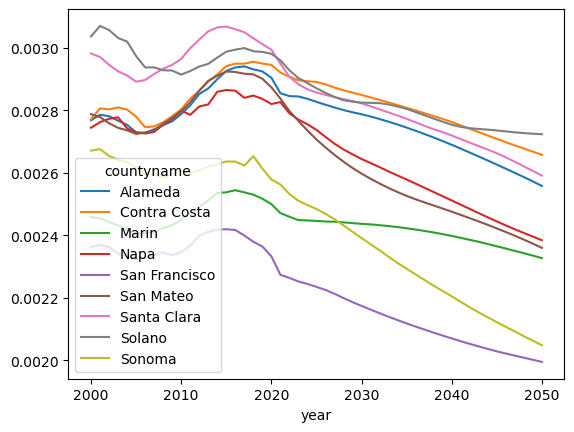

In [101]:
(bay_area_data_long.loc[:,:,'TOTPOP'] / bay_area_data_long.loc[:,:,'TOTHH']/1000).unstack(1).plot()